<a href="https://colab.research.google.com/github/srock01/Research-Project/blob/main/Research%20Project/FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Report
By: Sean Rock

###Optimization of Crashworthiness Design of Vehicles with Non-dominated Sorting Genetic Algorithm

The vehicle crashworthiness problem is a three-objective problem where the crash safety level of a vehicle is optimized. A higher safety level means how well a vehicle can protect the occupants from the effects of a frontal accident.

There are 5 decision variables (design parameters) that represent the thickness of reinforced members (thin-walled components of the automotive body Links to an external site.) around the car front.

Variable Constraints:

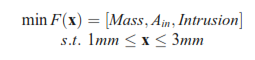

Where the three objective functions to evaluate are:

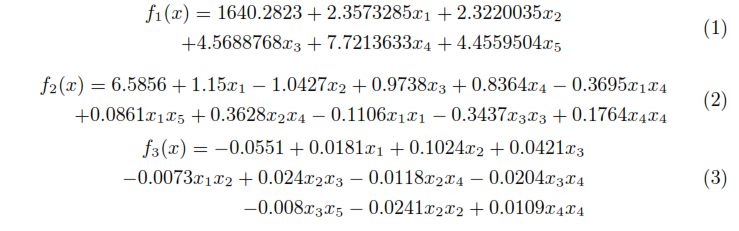

(1) For the consideration of lightweight, the mass of the vehicle is set as the first design objective.

(2) To take into account the worst scenario of acceleration-induced biomechanical damage of occupants, an integration of collision acceleration  in the full frontal crash is the second objective.

(3) To consider the most severe mechanical injury, the toe board intrusion in the offset-frontal crash is regarded as the third objective.

Algorithm: NSGA-II (Source: https://pymoo.org/algorithms/moo/nsga2.html)

In [2]:
pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=466825d2f247bf4eea4717a4bf5081c196f66162b1d839c41f45827ab9fcfd76
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


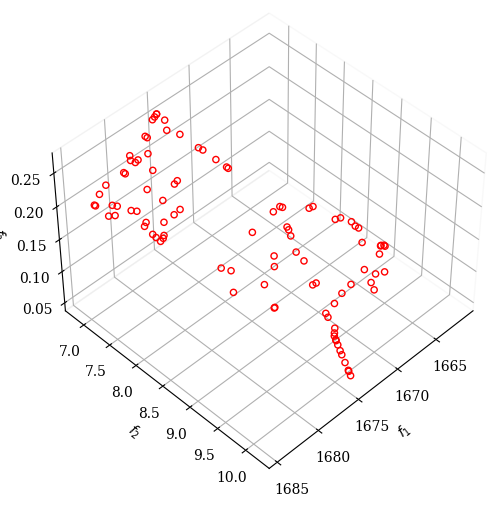

In [21]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import pymoo.gradient.toolbox as anp

import math
import numpy as np


class MyProblem(Problem):

    def __init__(self):
        low = np.array([1.0]*5)
        high =np.array([3.0]*5)
        super().__init__(n_var=5, n_obj=3, xl=low, xu=high, vtype=float)

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = (1640.2823+2.3573285*x[:,0]+2.3220035*x[:,1]+4.5688768*x[:,2]+
               7.7213633*x[:,3]+4.4559504*x[:,4])
        f2 = (6.5856+1.15*x[:,0]-1.0427*x[:,1]+
               0.9738*x[:,2]+0.8364*x[:,3]+0.3695*x[:,0]*x[:,3]+0.0861*x[:,0]*x[:,4]+
               0.3628*x[:,1]*x[:,3]-0.1106*x[:,0]*x[:,0]-0.3437*x[:,2]*x[:,2]+
               0.1764*x[:,3]*x[:,3])
        f3 = (0.0181*x[:,0]+0.1024*x[:,1]+0.0421*x[:,2]+
               -0.0073*x[:,0]*x[:,1]+0.024*x[:,1]*x[:,2]-0.0118*x[:,1]*x[:,3]-0.0204*x[:,2]*x[:,3]+
               -0.008*x[:,2]*x[:,4]-0.0241*x[:,1]*x[:,1]+0.0109*x[:,3]*x[:,3]-0.0551)

        out["F"] = anp.column_stack([f1, f2, f3])


problem = MyProblem()


algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 2000),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

The non-dominated solutions seen in this graph track considering those from Report 2. All three ranges of the objectives make sense compared to the F costs from ga algorithm runs with f1, f2 and f3 prioritized. In Report 2, the minimum F cost for these runs were 1612.144, 23.437, and 0.896. This algorithm performed better optimizing f2 (ranging from 7.0-10.0) and f3 (0.05-0.25) but performed slightly worse in regards to f1 (1666-1685). The relative improvements of f2 and f3 compared to my original genetic algorithm runs could be the result of having 2000 generations for the NSGA-II parameter compared to 1000 for ga parameter in Report 2.